Let's focus on the background of a facial recognition pipeline

In [1]:
from deepface import DeepFace
from deepface.modules import verification
import numpy as np
import matplotlib.pyplot as plt

In [2]:
model_name = "Facenet"

In [3]:
# https://github.com/serengil/deepface/tree/master/tests/dataset
img1_path = "../../deepface/tests/dataset/img1.jpg"
img2_path = "../../deepface/tests/dataset/img2.jpg"
# img2_path = "../../deepface/tests/dataset/img3.jpg"

### Detect and Align

In [4]:
img1 = DeepFace.extract_faces(img_path=img1_path)[0]["face"]
img2 = DeepFace.extract_faces(img_path=img2_path)[0]["face"]

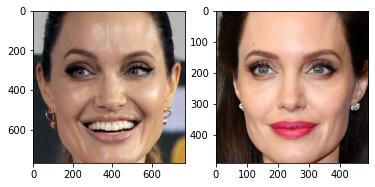

In [5]:
fig = plt.figure()

fig.add_subplot(1, 2, 1)
plt.imshow(img1)

fig.add_subplot(1, 2, 2)
plt.imshow(img2)

plt.show()

### Represent (Embedding)

In [6]:
emb1 = DeepFace.represent(img_path=img1, model_name = model_name, enforce_detection=False)[0]["embedding"]
emb2 = DeepFace.represent(img_path=img2, model_name = model_name, enforce_detection=False)[0]["embedding"]

In [7]:
distance_vector = np.square(np.array(emb1) - np.array(emb2))

In [8]:
print(f"{model_name} generates {len(emb1)} dimensional vector embeddings")

Facenet generates 128 dimensional vector embeddings


In [9]:
img1_graph = []
img2_graph = []
distance_graph = []

for i in range(0, len(emb1)):
    img1_graph.append(emb1)
    img2_graph.append(emb2)
    distance_graph.append(distance_vector)

img1_graph = np.array(img1_graph)
img2_graph = np.array(img2_graph)

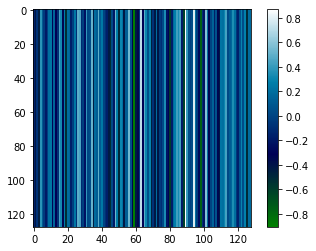

In [10]:
plt.imshow(img1_graph, interpolation="nearest", cmap=plt.cm.ocean)
plt.colorbar()

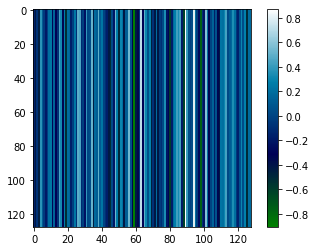

In [11]:
plt.imshow(img2_graph, interpolation="nearest", cmap=plt.cm.ocean)
plt.colorbar()

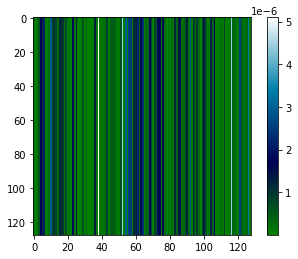

In [12]:
plt.imshow(distance_graph, interpolation="nearest", cmap=plt.cm.ocean)
plt.colorbar()

### Verify

In [13]:
distance = verification.find_euclidean_distance(emb1, emb2)

In [14]:
distance

0.009791401874680116

In [15]:
threshold = verification.find_threshold(model_name=model_name, distance_metric="euclidean")

In [16]:
threshold

10

In [17]:
distance < threshold

True